In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Variable Notes
<ul>
<li>PassengerId Unique ID of the passenger - <strong>ID пассажира</strong></li>
<li>Survived Survived (1) or died (0) - <strong>Идентификатор выжил пассажир или нет</strong></li>
<li>Pclass Passenger's class (1st, 2nd, or 3rd) - <strong>Класс пассажира</strong></li>
<li>Name Passenger's name - <strong>Имя</strong></li>
<li>Sex Passenger's sex - <strong>Пол</strong></li>
<li>Age Passenger's age - <strong>Возраст</strong></li>
<li>SibSp Number of siblings/spouses aboard the Titanic - <strong>Количество родственников/пар на корабле</strong></li>
<li>Parch Number of parents/children aboard the Titanic - <strong>Количество родителей/детей на корабле</strong></li>
<li>Ticket Ticket number - <strong>Номер билета</strong></li>
<li>Fare Fare paid for ticket - <strong>Стоимость билета</strong></li>
<li>Cabin Cabin number - <strong>Номер каюты пассажира</strong></li>
<li>Embarked Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown) - <strong>Откуда плыл пассажир</strong></li></ul>

#### Descriptive data statistics

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### How many passengers ssurvived ?

In [9]:
count_survived = data["Survived"].sum()
print(f"Count of survived: {count_survived}")

Count of survived: 342


#### How many male, female and child passengers were aboard the Titanic?

In [7]:
data['Person'] = data.Sex
data.loc[data['Age'] < 18, 'Person'] = 'Child'
print(f"Person categories : {data.Person.unique()}")
print(f"Distribution of person : {data.Person.value_counts()}")

Person categories : ['male' 'female' 'Child']
Distribution of person : male      519
female    259
Child     113
Name: Person, dtype: int64


#### How many nulls in the dataframe ?

In [10]:
missing_values = data.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Information about people whose tickets costed more than 200

In [12]:
value_counts = data[data['Fare'] > 200].value_counts()
value_counts

PassengerId  Survived  Pclass  Name                                                   Sex     Age   SibSp  Parch  Ticket    Fare      Cabin            Embarked  Person
28           0         1       Fortune, Mr. Charles Alexander                         male    19.0  3      2      19950     263.0000  C23 C25 C27      S         male      1
89           1         1       Fortune, Miss. Mabel Helen                             female  23.0  3      2      19950     263.0000  C23 C25 C27      S         female    1
119          0         1       Baxter, Mr. Quigg Edmond                               male    24.0  0      1      PC 17558  247.5208  B58 B60          C         male      1
300          1         1       Baxter, Mrs. James (Helene DeLaudeniere Chaput)        female  50.0  0      1      PC 17558  247.5208  B58 B60          C         female    1
312          1         1       Ryerson, Miss. Emily Borie                             female  18.0  2      2      PC 17608  262.3750  B57 B5

#### Sum of digits values

In [15]:
sum_values = data.select_dtypes(include=['int64']).sum()
sum_values

PassengerId    397386
Survived          342
Pclass           2057
SibSp             466
Parch             340
dtype: int64

#### Mean values of Fare grouped by Embarked

In [19]:
fare_embarked = data.groupby('Embarked')['Fare'].mean()

print(f'Mean ticket price:\n{fare_embarked}\n')

Mean ticket price:
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64



#### Unique values of AgeGroup and mean survived value by AgeGroup

In [31]:
data["AgeGroup"].unique()

['Young Adult', 'Adult', NaN, 'Child', 'Senior']
Categories (4, object): ['Child' < 'Young Adult' < 'Adult' < 'Senior']

In [16]:
bins = [0, 18, 30, 60, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

survival_rate = data.groupby('AgeGroup')['Survived'].mean()

print(f'Mean survived value by age groupes:\n{survival_rate}\n')

Mean survived value by age groupes:
AgeGroup
Child          0.503597
Young Adult    0.355556
Adult          0.420495
Senior         0.227273
Name: Survived, dtype: float64



#### Survival percent grouped by Pclass and Sex

In [21]:
survival_rate_pclass_sex = data.groupby(['Pclass', 'Sex'])['Survived'].mean()

print(f'Survival percent grouped by Pclass and Sex:\n{survival_rate_pclass_sex}\n')

Survival percent grouped by Pclass and Sex:
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64



#### Survival percent grouped by Sex

In [22]:
survived_by_sex = data.groupby(['Sex'])['Survived'].mean()
print(f'Survival percent grouped by Sex:\n{survived_by_sex}\n')

Survival percent grouped by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64



#### Survival percent grouped by Survived

In [27]:
data['Fare'] = data['Fare'].round(0)

In [29]:
survived_by_fare= data.groupby(['Survived'])['Fare'].mean()
print(f'Survival percent grouped by Survived:\n{survived_by_fare.sort_values(ascending=False)}\n')

Survival percent grouped by Fare:
Survived
1    48.391813
0    22.136612
Name: Fare, dtype: float64



### How to find spouses 

In [34]:
data['LastName'] = data['Name'].apply(lambda x: x.split(',')[0])

couples = data[data['LastName'].duplicated(keep=False) & data['Name'].str.contains('Mr.|Mrs.') & data['SibSp']>=1]

couples_sorted = couples.sort_values('LastName')
print(couples_sorted[['LastName', 'Name']])

    LastName                                             Name
746   Abbott                      Abbott, Mr. Rossmore Edward
279   Abbott                 Abbott, Mrs. Stanton (Rosa Hunt)
874  Abelson            Abelson, Mrs. Samuel (Hannah Wizosky)
308  Abelson                              Abelson, Mr. Samuel
498  Allison  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
..       ...                                              ...
450     West                            West, Mr. Edwy Arthur
472     West          West, Mrs. Edwy Arthur (Ada Mary Worth)
856     Wick       Wick, Mrs. George Dennick (Mary Hitchcock)
830  Yasbeck          Yasbeck, Mrs. Antoni (Selini Alexander)
620  Yasbeck                              Yasbeck, Mr. Antoni

[121 rows x 2 columns]


#### How to find children

In [41]:
data['LastName'] = data['Name'].apply(lambda x: x.split(',')[0])

children = data[data['LastName'].duplicated(keep=False) & data['Name'].str.contains('Miss|Master')]

children = children[data['Age'] < 18]

children_sorted = children.sort_values('LastName')

print("\nChildren:")
print(children_sorted[['LastName', 'Name']])


Children:
      LastName                                     Name
297    Allison             Allison, Miss. Helen Loraine
305    Allison           Allison, Master. Hudson Trevor
850  Andersson  Andersson, Master. Sigvard Harald Elias
813  Andersson       Andersson, Miss. Ebba Iris Alfrida
119  Andersson        Andersson, Miss. Ellis Anna Maria
..         ...                                      ...
63       Skoog                    Skoog, Master. Harald
205      Strom               Strom, Miss. Telma Matilda
419   Van Impe                Van Impe, Miss. Catharina
58        West             West, Miss. Constance Mirium
111     Zabour                     Zabour, Miss. Hileni

[69 rows x 2 columns]


C:\Users\Ксения\AppData\Local\Temp\ipykernel_12180\2602448071.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  children = children[data['Age'] < 18]


# Reverse images

In [42]:
import matplotlib.pyplot as plt
import os

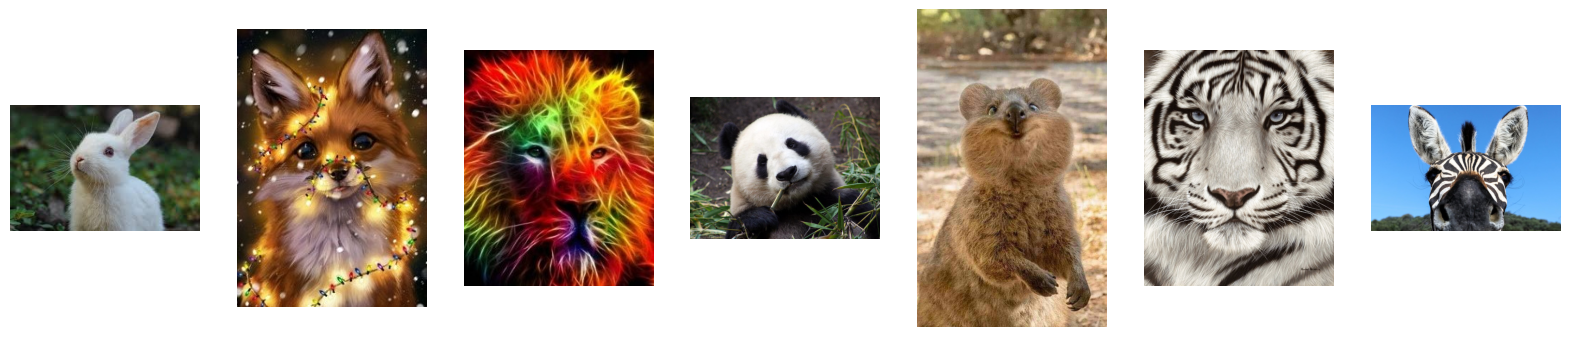

In [17]:
images_files = [f for f in os.listdir("images") if f.endswith('.jpg')]
fig, axs = plt.subplots(1, len(images_files), figsize=(20, 20))

for i, img in enumerate(images_files):
    images = plt.imread(f"images/{img}")
    axs[i].imshow(images)
    axs[i].axis('off')

plt.show()

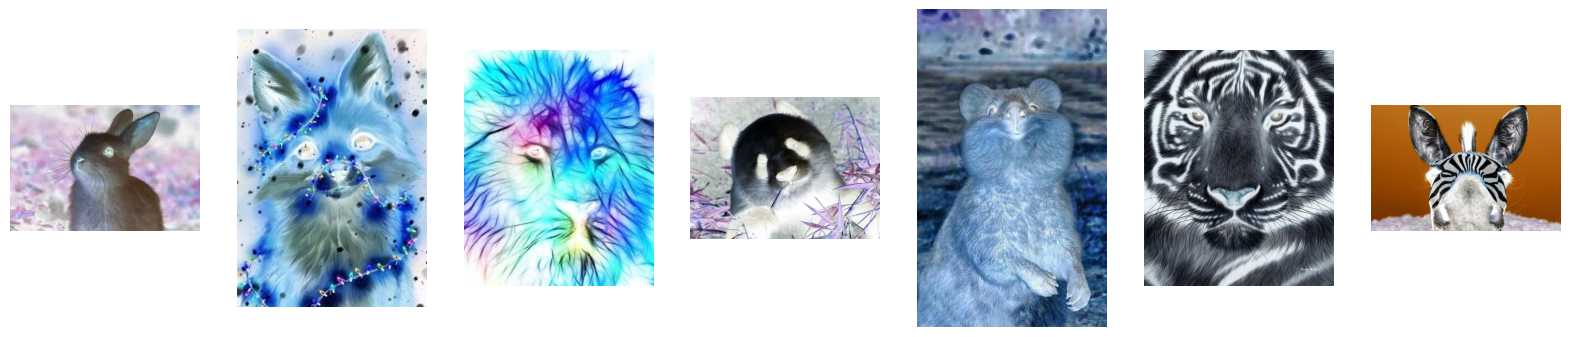

In [20]:
images_files = [f for f in os.listdir("images") if f.endswith('.jpg')]
fig, axs = plt.subplots(1, len(images_files), figsize=(20, 20))

for i, img in enumerate(images_files):
    images = plt.imread(f"images/{img}")
    reversed_imgs = 255 - images
    axs[i].imshow(reversed_imgs)
    axs[i].axis('off')

plt.show()

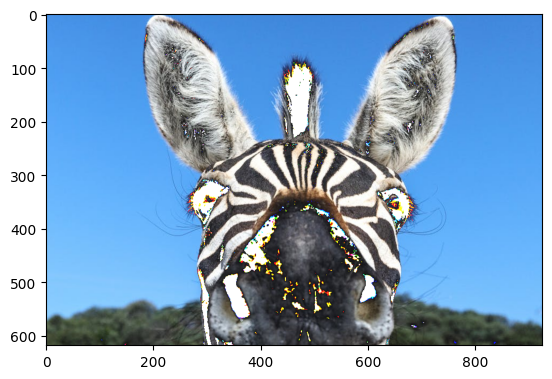

In [21]:
img_zebra = plt.imread("images/img_6.jpg")

data_zebra = img_zebra.copy()
data_zebra[data_zebra < 20] = 255
plt.imshow(data_zebra)